<style>
  body {
    color: black;
  }
  h1 {
    background-color: transparent;
    color: LightSteelBlue;
  }
  h3 {
    background-color: transparent;
    color: WhiteSmoke;
  }
  b {
    background-color: transparent;
    color: LightSteelBlue;
  }
</style>
<h1>Introduction</h1>
<h4>Column Names</h4>
<ul>
  <li><b>ArithmeticErrortarget:</b> the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)</li>
  <li><b>id:</b> The id of the tweet (2087)</li>
  <li><b>date:</b> The date of the tweet (Sat May 16 23:58:44 UTC 2009)</li>
  <li><b>flag:</b> The query (lyx). If there is no query, then this value is NO_QUERY.</li>
  <li><b>user:</b> The user that tweeted (robotickilldozr)</li>
  <li><b>text:</b> The text of the tweet (Lyx is cool)</li>
</ul>

<h4>Import</h4>

In [55]:
import csv
import sys
import objgraph
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime
from memory_profiler import profile
from IPython.core.display import Image

if __name__ == '__name__':
    print('Starting Spark Session. All data is loaded into memory')

<h4>Read the File</h4>

Read the csv file into a Python dataframe and then write it into a new file

In [2]:
df = pd.read_csv('.databases/tweets.csv', encoding='ISO-8859-1')
display(df)
display(df.shape)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


(1599999, 6)

<style>
  body {
    color: black;
  }
  h1 {
    background-color: transparent;
    color: LightSteelBlue;
  }
  h3 {
    background-color: transparent;
    color: WhiteSmoke;
  }
  b {
    background-color: transparent;
    color: LightSteelBlue;
  }
</style>
<h1>Action</h1>

Get the basic information about the content of the file

In [3]:
df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
print('The first five rows of the database')
display(df.head())
print('Information')
display(df.info())
print('Description')
df.describe()

The first five rows of the database


,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   id         1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


None

Description


,sentiment,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


<h3>Point *</h3>Now let us get the number of unique values in each column; we had 

**df.unstack().groupby(level=0).nunique()**

as a suggestion but it was over 6 times slower

In [4]:
# we had 
# df.unstack().groupby(level=0).nunique()
# as a suggestion but it was over 6 times slower
df.apply(pd.Series.nunique)

sentiment          2
id           1598314
date          774362
flag               1
user          659775
text         1581465
dtype: int64

In [5]:
for _ in df.columns:
    display(_)
    display(df[_].value_counts())

'sentiment'

sentiment
4    800000
0    799999
Name: count, dtype: int64

'id'

id
2190457769    2
1974742852    2
2062516845    2
1551586713    2
1563681287    2
             ..
2197311343    1
2197311196    1
2197311146    1
2197310899    1
2193602129    1
Name: count, Length: 1598314, dtype: int64

'date'

date
Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Fri Jun 05 11:05:33 PDT 2009    16
                                ..
Sun Jun 07 12:36:09 PDT 2009     1
Sun Jun 07 12:36:07 PDT 2009     1
Sun Jun 07 12:36:04 PDT 2009     1
Sun Jun 07 12:36:03 PDT 2009     1
Tue Jun 16 08:40:50 PDT 2009     1
Name: count, Length: 774362, dtype: int64

'flag'

flag
NO_QUERY    1599999
Name: count, dtype: int64

'user'

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: count, Length: 659775, dtype: int64

'text'

text
isPlayer Has Died! Sorry                                                                              210
good morning                                                                                          118
headache                                                                                              115
Good morning                                                                                          112
Headache                                                                                              106
                                                                                                     ... 
braces  tell me it will be okay...                                                                      1
is stuck at home without curry                                                                          1
@mrsduryee I've applied to about 70 since I lost my job in March...it certainly FEELS like a lot!       1
The cheese I got @SarawithanR lost its sq


To see the whole width of the table we make a small permanent change

In [6]:
pd.set_option('display.max_colwidth', None)

Let us see if some of the functions work properly and how we can use them to gain more information about this database. Here we list all the tweets that are generated by the user 'lost_dog'. We choose to only print the texts and nothing else.

In [7]:
print(df[df['user'].astype('string') == 'lost_dog']['text'])

43934              @NyleW I am lost. Please help me find a good home. 
45573             @SallyD I am lost. Please help me find a good home. 
46918         @zuppaholic I am lost. Please help me find a good home. 
47948         @LOSTPETUSA I am lost. Please help me find a good home. 
50571     @JeanLevertHood I am lost. Please help me find a good home. 
                                      ...                             
792408       @trooppetrie I am lost. Please help me find a good home. 
793313         @Carly_FTS I am lost. Please help me find a good home. 
793609         @inathlone I am lost. Please help me find a good home. 
798607              @Kram I am lost. Please help me find a good home. 
799404         @W_Hancock I am lost. Please help me find a good home. 
Name: text, Length: 549, dtype: object


Find the 50 users that generated the most tweets

In [8]:
grouped_df = df.groupby(['user']).count()
sorted_df = grouped_df.sort_values(by=['user'], ascending=False)
largest_df = sorted_df.nlargest(50, 'flag')
display(largest_df)

,sentiment,id,date,flag,text
user,,,,,
lost_dog,549,549,549,549,549
webwoke,345,345,345,345,345
tweetpet,310,310,310,310,310
SallytheShizzle,281,281,281,281,281
VioletsCRUK,279,279,279,279,279
mcraddictal,276,276,276,276,276
tsarnick,248,248,248,248,248
what_bugs_u,246,246,246,246,246
Karen230683,238,238,238,238,238


<style>
  span {
    background-color: transparent;
    color: orange;
  }
</style>
What differs the tweets that share the same ID but are still saved in this dataframe, from the others, is that they have different sentiments; don't ask me why but some seem totally unreasonable. For instance, why should the following tweet, with the ID# 1467863684, be both positive and negative at the same time? Is it because they have mentioned the word "sad"?

<span>Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie</span>

<h2>Investigating the Sentiments</h2>

As we see in Point * above, there are tweet IDs that are redundant. As a matter of fact, 1,598,314 out of 1,599,999 tweets have unique IDs. So, let us have a look at it and see what we can find out.

<h3>Step 1: Find Duplicates</h3>

Try and find how many tweets have more than one sentiment related to them. For this we count the occurrences of each value in the 'id' column

In [9]:
all_ids = df['id'].value_counts()
display(all_ids)

id
2190457769    2
1974742852    2
2062516845    2
1551586713    2
1563681287    2
             ..
2197311343    1
2197311196    1
2197311146    1
2197310899    1
2193602129    1
Name: count, Length: 1598314, dtype: int64

We then filter the result to include only values that appear twice or more

In [10]:
duplicated_tweet_ids = all_ids[all_ids >= 2]
display(duplicated_tweet_ids)

id
2190457769    2
1974742852    2
2062516845    2
1551586713    2
1563681287    2
             ..
2015412220    2
2006617256    2
1933201064    2
2189722020    2
1982279593    2
Name: count, Length: 1685, dtype: int64

This shows clearly that as we expected 1,599,999 - 1,598,314 = 1,685 tweets have double sentiments. So we print the rows in df for which the 'id' column is in repeated_values.index

In [11]:
duplicated_tweets = df[df['id'].isin(duplicated_tweet_ids.index)]
display(duplicated_tweets.sort_values(by='id').head(50))

,sentiment,id,date,flag,user,text
212,0,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
800260,4,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
274,0,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
800299,4,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
988,0,1468053611,Mon Apr 06 23:28:09 PDT 2009,NO_QUERY,mariejamora,@hellobebe I also send some updates in plurk but i upload photos on twitter! you didnt see any of my updates on plurk? Zero?
801279,4,1468053611,Mon Apr 06 23:28:09 PDT 2009,NO_QUERY,mariejamora,@hellobebe I also send some updates in plurk but i upload photos on twitter! you didnt see any of my updates on plurk? Zero?
1176,0,1468100580,Mon Apr 06 23:42:57 PDT 2009,NO_QUERY,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff
801572,4,1468100580,Mon Apr 06 23:42:57 PDT 2009,NO_QUERY,cristygarza,good night swetdreamss to everyonee and jared never chat in kyte puff
1253,0,1468115720,Mon Apr 06 23:48:00 PDT 2009,NO_QUERY,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss you so much on the MFC but hope we can talk later on today kisses :huglove:
801649,4,1468115720,Mon Apr 06 23:48:00 PDT 2009,NO_QUERY,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss you so much on the MFC but hope we can talk later on today kisses :huglove:


Now we check if those rows with duplicate ids have one 0 and one 4 in the sentiment column. We do it by adding the sentiments for each duplicated tweet. If they all have 4 as the result of the aggregation, we can conclude that each duplicate has received one 0 and one 4 as sentiment value. Consequenlty

In [12]:
aggregated_sentiments = duplicated_tweets.groupby('id').agg({'sentiment': 'sum', 'text': 'first'})
display(aggregated_sentiments)

,sentiment,text
id,,
1467863684,4,Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot; O-: I like the look of the new transformer movie
1467880442,4,"Haven't tweeted nearly all day Posted my website tonight, hopefully that goes well Night time!"
1468053611,4,@hellobebe I also send some updates in plurk but i upload photos on twitter! you didnt see any of my updates on plurk? Zero?
1468100580,4,good night swetdreamss to everyonee and jared never chat in kyte puff
1468115720,4,@ientje89 aw i'm fine too thanks! yeah i miss you so much on the MFC but hope we can talk later on today kisses :huglove:
...,...,...
2193278017,4,"oh dear HH is back please twitter do something about her. I'm begging you, please pretty please"
2193403830,4,"english exam went okay revising for french, r.e and geography now, urrff"
2193428118,4,"finally finished typing!!!! Woohoooo , still need to add graphs though"


Which can be tested by asking if the number of 4s in the 'sentiment' column is the same as the size of the table

In [13]:
aggregated_sentiments['sentiment'].value_counts()

sentiment
4    1685
Name: count, dtype: int64

And this means <h3>YES</h3> We can go on with the next step and try to remove one of the duplicates and change the sentiment of the other one to 2, which is the same as 'natural'

<h3>Step 2: Remove Duplicates</h3>

Let us remove those rows in df that have the same id as in duplicated_tweet_ids and a sentiment of 0

In [14]:
df_wihout_duplicates = df[~(df['id'].isin(duplicated_tweet_ids.index) & (df['sentiment'] == 0))]
display(df_wihout_duplicates)

,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


<h3>Step 3: Neutralize the Sentiments</h3>

Set the sentiment of those rows in 'df' that are mentioned in the list of duplicated ids 'duplicated_tweet_ids' to 2 to mean that they should be classified - or percepted - as neutral

In [15]:
# change the sentiment of those rows in df_wihout_duplicates that are listed in duplicated_tweet_ids to 2
neutralized_df = df_wihout_duplicates.copy()
neutralized_df.loc[neutralized_df['id'].isin(duplicated_tweet_ids.index), 'sentiment'] = 2
display(neutralized_df)


,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


Let us check if the change has worked out

In [16]:
neutralized_df.apply(pd.Series.nunique)

sentiment          3
id           1598314
date          774362
flag               1
user          659775
text         1581465
dtype: int64

Yes indeed; we have three categories of sentiment now. And to make sure

In [17]:
neutralized_df['sentiment'].value_counts()

sentiment
4    798315
0    798314
2      1685
Name: count, dtype: int64

<h1>Cleaning Out</h1>

We also skip the flag, that has no function in any types of investigations. Perhaps if we would combine it with other databases, we'll have to take it back. But for now, we just drop it.

In [18]:
flagless_df = neutralized_df.drop(columns=['flag'])

And the result is

In [19]:
flagless_df.head(50)

,sentiment,id,date,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,erinx3leannexo,spring break in plain city... it's snowing


We have 1,685 tweets with neutral sentiment. The amount of neutral sentiments is comparably very low, but still better nothing at all.

Let us also drop all unnecessary columns for tweet sentiment classification.

In [20]:
singledout_df = flagless_df.drop(columns=['id', 'date', 'user'])

And the result is

In [21]:
display(singledout_df)

,sentiment,text
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best feeling ever
1599995,4,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


<style>span{background-color: transparent; color: orange;}</style><span>Thus, 'singledout_df' is the table we are going to use for training our ML solution.</span>

<h1>The Vocabulary</h2>

<h3>Step 1: Gather Unique Tokens</h3>
<ul>
  <li>First we make one big text out of all tokens used in the 'text' column; we call it 'corpus'</li>
  <li>We save a list of all the unique tokens from the 'corpus' in a csv-file for ease of use; this one we'll call 'token_list'</li>
  <li>We'll find and add the frequency of each token in the 'corpus' to the 'token_list'</li>
</ul>

Here we use join instead of str.cat
<ol>
    <li>corpus = singledout_df['text'].str.cat(sep=' ')</li>
    <li>corpus = ' '.join(singledout_df['text'].astype(str))</li>
</ol>

Join shows to have a shorter Execution Time but a somewhat longer Overhead Time, whereas str.cat has the opposite characteristics. And to borrow from my dear companion, Chat GPT: "In general, the join method may use slightly less memory than str.cat, especially if you use the astype(str) method to convert the values in the DataFrame column to strings before concatenation. This is because the join method creates a new string object containing the concatenated strings, whereas str.cat creates a new Series object containing the concatenated strings."

In [83]:
corpus = ' '.join(singledout_df['text'].astype(str))

We can readily see that a character in this systm, PowerMac Laptop 1.4 GHz Quad-Core Intel Core i5 with Ventura 13.3.1, Visual Studio Code Version: 1.77.3 (Universal), Jupyter Notebook 6.4.12, is 1 byte long but with a overhead of 49 bytes

In [84]:
print(f'The string "T" is {len("T")} characters long')
print(f'But it occupies a total of {sys.getsizeof("T")} bytes')

The string "T" is 1 characters long
But it occupies a total of 50 bytes


Thus, we expect the whole 'corpus' that is

In [85]:
print(f'{len(corpus)} characters long')

119980390 characters long


to take 119,980,390 + 49 = 119,980,439 bytes of memory, but

In [86]:
print(f'the "corpus" takes {sys.getsizeof(corpus)} bytes of memory')

the "corpus" takes 119980463 bytes of memory


To investigate the reason we install and use "memory_profiler"

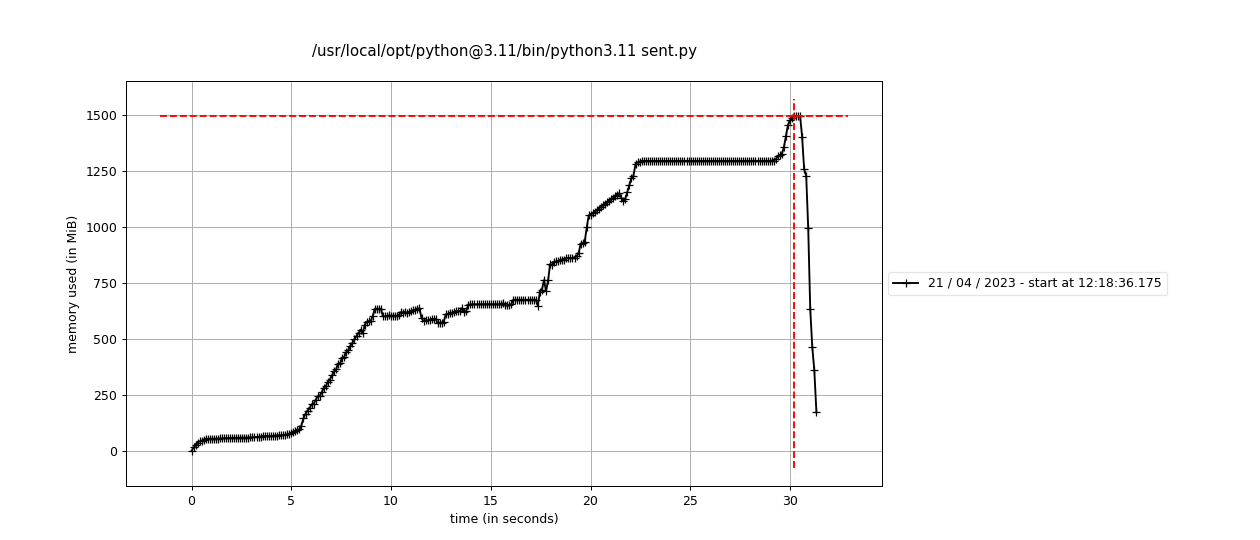

In [87]:
Image(filename='./memory_time-space_profile.png')

Graph written to /var/folders/1s/vk0n_73d4ndcz49qcnxf6wf40000gp/T/objgraph-2sgg2fs8.dot (22 nodes)
Image generated as corpus_backrefs_4-5.png


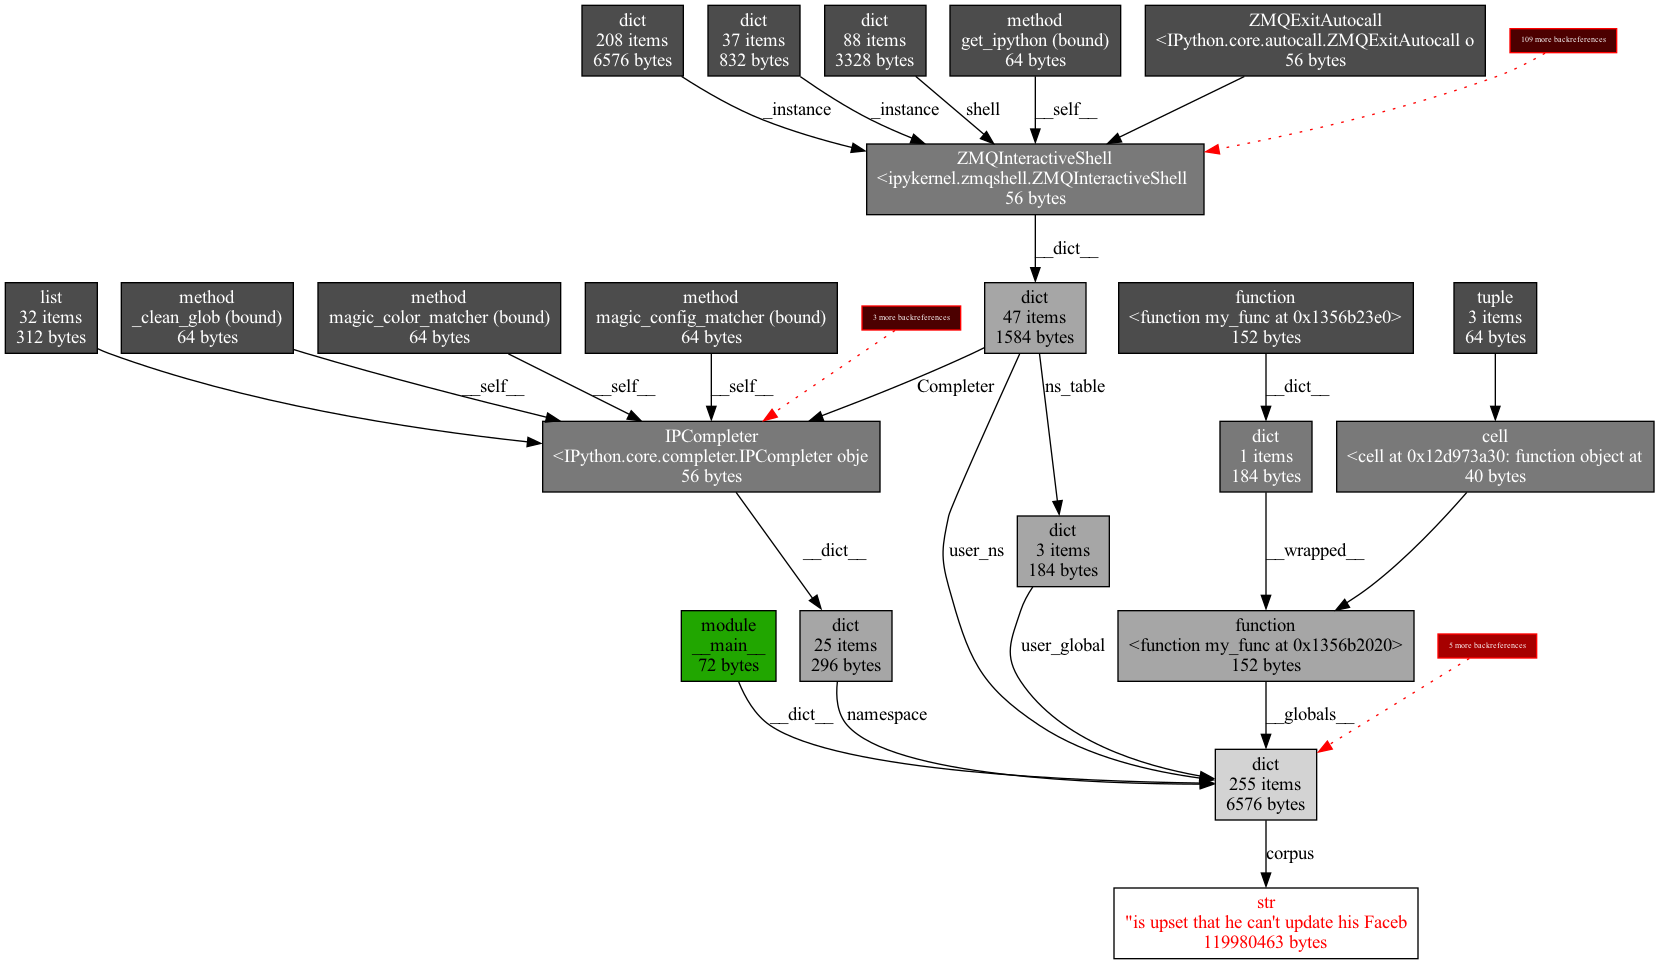

In [140]:
objgraph.show_backrefs(corpus, max_depth=4, too_many=5, filename='corpus_backrefs_4-5.png', extra_info=lambda x: f"{sys.getsizeof(x)} bytes")
Image(filename='./corpus_backrefs_4-5.png')

<h3>Step 2: Calculate Google-type Statistics</h3>

<ul>
    <li>Word frequency analysis: This algorithm counts the frequency of each word in a text and identifies the most common words.</li>
    <li>TF-IDF: This algorithm identifies the most important words in a text by comparing their frequency in the text to their frequency in a larger corpus of texts.</li>
    <li>Latent Dirichlet Allocation (LDA): This algorithm is used for topic modeling, which involves identifying the topics present in a text or set of texts.</li>
    <li>Word2Vec: This algorithm creates a vector representation for each word in a text, which can be used for various NLP tasks like semantic similarity and word analogy.</li>
    </li>Deep Learning Models: Google also uses deep learning models such as neural networks for various NLP tasks, including language translation, sentiment analysis, and question answering.</li>
</ul>

<h3>Step 3: Remove Unnecessary Tokens</h3>

<ul>
  <li>Then we'll decide upon which tokens can affect our classification algorithm and we should keep and which tokens that are unnecessary to crowd our text with, which we should remove</li>
  <li>We will also need to look at the three categories of sentiments and try to find what differentiates a positive sentiment from a negative or a neutral one, with regard to the words used in their related texts</li>
  <li>At last, we'll prune the 'text' column to leave only the words that are necessary to keep in each tweet. This is what constitutes the input to our ML system. And we'll save this as another csv-file, together with the corresponding sentiments - the outputs - which we will call the 'column'
</ul>

<h1>Side Track - Split the Date</h1>

Divide the 'date' into separate columns with the names 'day name', 'year', 'month', 'day', 'hour', 'minute', 'second'**

Let us see how many time zones are mentioned in the table

In [27]:
flagless_df['date'].str.extract(r'([A-Z]{3})', expand=False).value_counts()

date
PDT    1598314
Name: count, dtype: int64

This shows that we only have PDT as the time zone. We can thus skip this by removing it from all the strings in the 'date' column

In [28]:
zoneless_df = flagless_df.copy()
zoneless_df['date'] = zoneless_df['date'].str.replace('PDT', '')
zoneless_df.head()

,sentiment,id,date,user,text
0,0,1467810672,Mon Apr 06 22:19:49 2009,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 2009,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 2009,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 2009,joy_wolf,@Kwesidei not the whole crew


Now we can divide the date up into 6 different columns, for other investigations than the main subject of this project

In [29]:
separated_df = zoneless_df.copy()
# Convert the 'date' column to a datetime type
separated_df['date'] = pd.to_datetime(separated_df['date'], format='%a %b %d %H:%M:%S %Y')
# Extract individual date components into separate columns
separated_df['year'] = separated_df['date'].dt.year
separated_df['month'] = separated_df['date'].dt.month
separated_df['day'] = separated_df['date'].dt.day
separated_df['hour'] = separated_df['date'].dt.hour
separated_df['minute'] = separated_df['date'].dt.minute
separated_df['second'] = separated_df['date'].dt.second
separated_df['weekday'] = separated_df['date'].dt.weekday
# Drop the original 'date' column
dateless_df = separated_df.drop('date', axis=1)

Now show the neutralized, zoneless df with separated date details

In [30]:
dateless_df.sort_values(by='weekday', ascending=True).head(1599999)

,sentiment,id,user,text,year,month,day,hour,minute,second,weekday
0,0,1467810672,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,2009,4,6,22,19,49,0
753137,0,2286778838,lovingjordan,I am so sad about Jon and Kate n their beautiful kids...,2009,6,22,16,54,52,0
753136,0,2286778725,RenaWaka,when is the rain going to Stop?!!,2009,6,22,16,54,52,0
753135,0,2286778561,Bgarzza,I need some more chap stick...,2009,6,22,16,54,51,0
753134,0,2286778000,sega_123,jeanette is sick. and taking a nap. but her brother is flying over to cali this tuesday.,2009,6,22,16,54,48,0
...,...,...,...,...,...,...,...,...,...,...,...
879353,4,1685426805,zaibatsu,@rosehwang It's not my puppy Doing great,2009,5,3,0,20,31,6
879354,4,1685426828,Kbear_3,He's so sweeet,2009,5,3,0,20,31,6
879355,4,1685426956,jaded0ll,@demois i'm sorry i wasn't able to be one of your plurk defenders. lol. but i promise to help you next time someone b*tches on you. lol.,2009,5,3,0,20,34,6
879346,4,1685426618,ongmaggie,"@oyebto nope, it was at 11+pm. giant at tampines opens till midnight",2009,5,3,0,20,28,6


Show the result, sorted by 'id' in descending order

In [31]:
dateless_df.sort_values(by='id', ascending=False).head(10)

,sentiment,id,user,text,year,month,day,hour,minute,second,weekday
799998,0,2329205794,tpchandler,has to resit exams over summer... wishes he worked harder at first year of uni...,2009,6,25,10,28,31,3
799997,0,2329205574,davidlmulder,@Eric_Urbane Sounds like a rival is flagging your ads. Not much you can do about that though,2009,6,25,10,28,30,3
799996,0,2329205473,LeeLHoke,rest in peace Farrah! So sad,2009,6,25,10,28,30,3
799995,0,2329205038,bigenya,Gmail is down?,2009,6,25,10,28,28,3
799994,0,2329205009,dandykim,Sick Spending my day laying in bed listening to @taylorswift13,2009,6,25,10,28,28,3
799993,0,2329204987,360cookie,Tried to get the mutant Fawkes to follow me but he wouldn't it's so lonely without followers I have never had one :$,2009,6,25,10,28,28,3
799992,0,2329204835,mattfca,My life http://mattf.ca/2009/06/24/yay-me/,2009,6,25,10,28,27,3
799991,0,2329204790,CJROSE218,@koolgirl37 read my tweet below,2009,6,25,10,28,27,3
799990,0,2329204705,loveisnothing,@iaintnohomo Banana will be playing later. BUT. Shell be playing with Caro.,2009,6,25,10,28,27,3
799989,0,2329204651,Badmantalking,"and I think it has a mind of its own,like it always ring when I'm taking a leak..jeez that makes whole thing embarrassingly musical",2009,6,25,10,28,26,3


<h1>Side Track Follow-Up:</h1>

**TODO:** Find the ten dates when the most tweets were generated

**TODO: Find out the change in the frequnency of tweets per day**

**TODO : See if there is a correlation between the sentiment of the tweet and the day it was made**

**TODO : See if there is a correlation between the sentiment of the tweet and the time of the day it was made; eg if the tweets tens to be more negative at night compared to days and so on**

<h1>TEST ZONE</H1>

In [32]:
# extract the row with the id number 1467811372
df.loc[df['id'] == 1467813782]

,sentiment,id,date,flag,user,text
18,0,1467813782,Mon Apr 06 22:20:34 PDT 2009,NO_QUERY,gi_gi_bee,@FakerPattyPattz Oh dear. Were you drinking out of the forgotten table drinks?


In [35]:
# create a sample dataframe
daf = pd.DataFrame({'col1': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]})
display(daf)
# count the occurrences of each value in the 'col1' column
value_counts = daf['col1'].value_counts()
display(value_counts)
# filter the result to include only values that appear three times or more
repeated_values = value_counts[value_counts >= 3]
display(repeated_values)
# print the repeated values
print(repeated_values.index.tolist())

,col1
0,1
1,2
2,2
3,3
4,3
5,3
6,4
7,4
8,4
9,4


col1
4    4
3    3
2    2
1    1
Name: count, dtype: int64

col1
4    4
3    3
Name: count, dtype: int64

[4, 3]


In [60]:
import pkg_resources
print(pkg_resources.resource_filename('graphviz', ''))

/Users/matt/Documents/Documents_Afsaneh/Courses/IT_Hogskolan/Projects/final_pro/.venv/lib/python3.11/site-packages/graphviz


In [126]:
import pydot

def references_graph(obj, max_depth=3, too_many=10):
    edges = []
    nodes = set()
    nodeid = 0

    def get_node(obj, depth):
        nonlocal nodeid
        if depth == 0:
            return None
        if id(obj) in nodes:
            return str(id(obj))
        if len(nodes) >= too_many:
            return None

        node_name = repr(obj)[:30]
        nodes.add(id(obj))
        node = pydot.Node(str(nodeid), label=node_name, shape='box')
        nodeid += 1

        for ref in gc.get_referents(obj):
            child_node = get_node(ref, depth - 1)
            if child_node is not None:
                edges.append((node, child_node))

        return node

    get_node(obj, max_depth)
    graph = pydot.graph_from_edges(edges, directed=True)
    graph.write_png('corpus_backrefs.png')